In [98]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

In [99]:

dataset = pd.read_excel("Intensidad ventana movil.xlsx",sheet_name = 'Intensidad tormenta4') 
dataset

,Ciudad,lon,lat,Data 5 min (mm/min) MOVIL,Data 10 min (mm/min) MOVIL,Data 15 min (mm/min) MOVIL,Data 30 min (mm/min) MOVIL,Data 60 min (mm/min) MOVIL
0,Coronel,-73.145642,-37.029414,0.00,0.00,0.000,0.000,0.000
1,San pedro,-73.139719,-36.849882,0.08,0.06,0.053,0.040,0.027
2,UCSC,-73.051683,-36.794926,0.08,0.08,0.067,0.067,0.057
3,Talcahuano,-73.115303,-36.714941,0.08,0.08,0.067,0.053,0.047
4,Penco,-72.993246,-36.738101,0.08,0.08,0.053,0.047,0.043
5,Caleta Lenga,-73.171123,-36.771393,0.08,0.08,0.067,0.067,0.057


In [100]:
#El vector data se debe modificar segun la ventana movil que se quiera graficar espacialmente
# Entonces los valores que se mofician son las de las columnas del vector data

#Venta Movil
Data =  np.array(dataset.iloc[:,[1,2,7]].values.tolist())
lon = Data[:,0] 
lat = Data[:,1]
intensidad = Data[:,2]


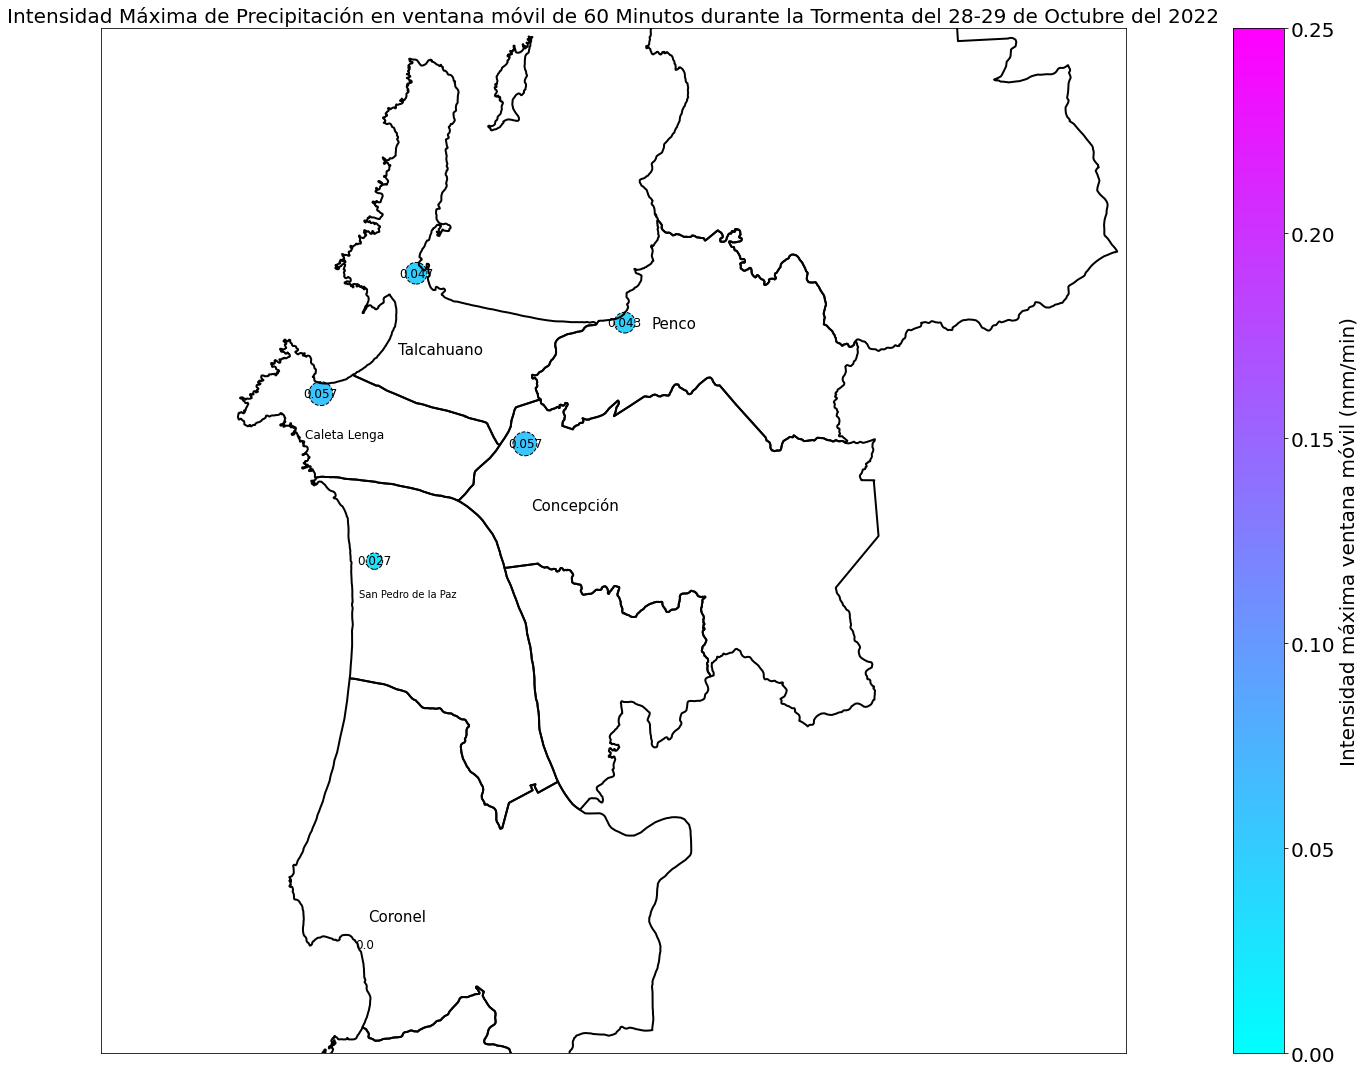

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

# Crea un mapa de la región del Biobío centrado en Coronel y Talcahuano
m = Basemap(llcrnrlon=-73.3, llcrnrlat=-37.08, urcrnrlon=-72.7, urcrnrlat=-36.6,
            resolution='f', projection='merc', lat_0=-36.95, lon_0=-73.12)

fig, ax = plt.subplots(figsize=(30, 15))
fig.subplots_adjust(right=1)
# Carga el Archivo Shape deseado
m.readshapefile(r'C:\Users\garri\Desktop\Nucleo CT UCSC\Tormentas\Codigos y archivos\Intensidades Tormentas Ventanas moviles en el espacio\comcost','comcost',linewidth=2)

# Se otorgan manualmente las coordenadas de las distintas ciudades
lon_concepcion, lat_concepcion = -73.0479, -36.8261
lon_penco, lat_penco = -72.9956, -36.7333
lon_san_pedro_de_la_paz, lat_san_pedro_de_la_paz = -73.1039909, -36.8414183
lon_talcahuano, lat_talcahuano = -73.1167, -36.7167
lon_caleta_lenga, lat_caleta_lenga = -73.1714, -36.7669
lon_coronel, lat_coronel = -73.1569, -37.0292

# Esto se realiza para que se ubiquen en el basemap
x_concepcion, y_concepcion = m(lon_concepcion, lat_concepcion)
x_penco, y_penco = m(lon_penco, lat_penco)
x_san_pedro_de_la_paz, y_san_pedro_de_la_paz = m(lon_san_pedro_de_la_paz, lat_san_pedro_de_la_paz)
x_talcahuano, y_talcahuano = m(lon_talcahuano, lat_talcahuano)
x_caleta_lenga, y_caleta_lenga = m(lon_caleta_lenga, lat_caleta_lenga)
x_coronel, y_coronel = m(lon_coronel, lat_coronel)

# Agrega los símbolos de las ciudades
m.plot(x_concepcion, y_concepcion)
plt.text(x_concepcion, y_concepcion, 'Concepción', fontsize=15)
m.plot(x_talcahuano, y_talcahuano)
plt.text(x_talcahuano - 1000, y_talcahuano - 5000, 'Talcahuano', fontsize=15)
m.plot(x_coronel, y_coronel)
plt.text(x_coronel + 1500, y_coronel + 1500, 'Coronel', fontsize=15)
m.plot(x_caleta_lenga, y_caleta_lenga)
plt.text(x_caleta_lenga - 1000, y_caleta_lenga - 3500, 'Caleta Lenga', fontsize=12)
m.plot(x_san_pedro_de_la_paz, y_san_pedro_de_la_paz)
plt.text(x_san_pedro_de_la_paz - 5000, y_san_pedro_de_la_paz - 3500, 'San Pedro de la Paz', fontsize=10)
m.plot(x_penco, y_penco)
plt.text(x_penco + 2000, y_penco - 1000, 'Penco', fontsize=15)



# Se grafica scatter plot
x, y = m(lon, lat) # coordenadas ventana movil

#Intensidad0 es ventana movil)
sc1 = m.scatter(x, y, s=intensidad*10000, c=intensidad, marker="o", cmap='cool', alpha=1, edgecolor='k', linestyle='--')
for i, j, val in zip(x, y, intensidad):
    plt.text(i , j, str(val), fontsize=12, ha='center', va='center')

# Primera colorbar ventana movil
sc1.set_clim(vmin=0, vmax=0.25)

cbar = plt.colorbar(sc1)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Intensidad máxima ventana móvil (mm/min)', fontsize=20)
# Ajusta la posición de la primera colorbar
#cbar.ax.set_position([0.92, 0.25, 0.03, 0.5]) # Ajusta la posición y el tamaño de la colorbar



# Añadir título al gráfico
plt.title('Intensidad Máxima de Precipitación en ventana móvil de 60 Minutos durante la Tormenta del 28-29 de Octubre del 2022', fontsize=20)

# Ajusta los márgenes y espacios entre subplots
plt.tight_layout()

plt.savefig('Intesidad maxima ventana movil 60 minutos 28-29 DE OCTUBRE 2022.png',dpi=900)
